# 数据清洗与分析 - Wrangle_act

## 简介

下面将要整理 (以及分析和可视化) 的数据集是推特用户 [@dog_rates](https://twitter.com/dog_rates) 的档案, 推特昵称为 [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs)。WeRateDogs 是一个推特主，他以诙谐幽默的方式对人们的宠物狗评分。这些评分通常以 10 作为分母。但是分子则一般大于 10：11/10、12/10、13/10 等等。为什么会有这样的评分？因为 "[They're good dogs Brent.](https://knowyourmeme.com/memes/theyre-good-dogs-brent)" WeRateDogs 拥有四百多万关注者，曾受到国际媒体的报道。

WeRateDogs [下载了他们的推特档案](https://support.twitter.com/articles/20170160)，并通过电子邮件发送给优达学城，专门为本项目使用。这个档案是基本的推特数据（推特 ID、时间戳、推特文本等），包含了截止到 2017 年 4 月 1 日的 5000 多条推特。

## 数据收集

### 完善推特档案

WeRateDogs 的推特档案包括 5000 多条推特的基本信息，但并不包括所有内容。不过档案中有一列包含每个推特的文本，我用这一列数据提取了评分、狗的名字和“地位”（即 doggo、floofer、pupper 和 puppo）——这使数据得以“完善”。在这 5000 多条中，我只筛选出了 2356 条包含评分的推特数据。

In [1]:
# 导入库
import pandas as pd
import numpy as np
import requests
import json
import os
import matplotlib.pyplot as plt
% matplotlib inline

#### 数据来源1：WeRateDogs 的推特档案 (手头文件)

In [2]:
# 读取推特信息
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# 查看推特信息前5行
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 数据来源2：推特图像的预测数据 (从互联网下载数据)

In [4]:
# 读取推特图像的预测数据提供的URL进行编程读取
url_image_predictions = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
r = requests.get(url_image_predictions, timeout=20)

In [5]:
# 读取URL的文件名称
url_image_predictions.split('/')[-1]

'image-predictions.tsv'

In [6]:
# 读取URL的状态
r.status_code

200

In [7]:
r.headers

{'Content-Type': 'text/plain; charset=utf-8', 'Content-Security-Policy': "default-src 'none'; style-src 'unsafe-inline'; sandbox", 'Strict-Transport-Security': 'max-age=31536000', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'deny', 'X-XSS-Protection': '1; mode=block', 'ETag': 'W/"6d12be6a0a5c5b2ba7a1cc8df4f11746ca8dbc5a"', 'Cache-Control': 'max-age=300', 'X-Geo-Block-List': '', 'Content-Encoding': 'gzip', 'X-GitHub-Request-Id': '150A:1803:407298:424943:5B87561E', 'Content-Length': '115223', 'Accept-Ranges': 'bytes', 'Date': 'Thu, 30 Aug 2018 02:27:45 GMT', 'Via': '1.1 varnish', 'Connection': 'keep-alive', 'X-Served-By': 'cache-sin18028-SIN', 'X-Cache': 'MISS', 'X-Cache-Hits': '0', 'X-Timer': 'S1535596065.355181,VS0,VE308', 'Vary': 'Authorization,Accept-Encoding, Accept-Encoding', 'Access-Control-Allow-Origin': '*', 'X-Fastly-Request-ID': 'f11c341ee22c4caa5cc89d97687977e45ffb71dc', 'Expires': 'Thu, 30 Aug 2018 02:32:45 GMT', 'Source-Age': '0'}

In [8]:
# 创建image-predicitons.tsv文件
with open('image-predictions.tsv','wb') as file:
    file.write(r.content)

In [9]:
# 读取image-predictions.tsv文件
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [10]:
# 查看推特图像的预测数据前5行
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 数据来源3：每条推特的额外附加数据 (至少要包含转发数（retweet_count）和喜欢数（favorite_count）)

In [11]:
# 读取tweet_json.txt文件,因其他列不需要，只获取 ['id', 'retweet_count', 'favorite_count'] 三列
with open('tweet_json.txt', 'rb') as file:
    f1 = file.readlines()
    file_list = []
    for line in f1:
        line1 = json.loads(line)
        file_list.append(line1)
extra_data = pd.DataFrame(file_list, columns=['id', 'retweet_count', 'favorite_count'])

In [12]:
# 查看推特的额外附加数据的前5行
extra_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016


## 数据评估

数据评估分为**可视评估**和**编程评估**来发现**数据质量问题**和**数据整洁度问题**。

In [13]:
# 查看推特信息随机5行
twitter_archive_enhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
983,749395845976588288,NaN,NaN,2016-07-03 00:14:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is George. He just remembered that bees a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749395845...,10,10,George,None,None,None,None
1831,676215927814406144,NaN,NaN,2015-12-14 01:43:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Herm. He just wants to be like the oth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676215927...,9,10,Herm,None,None,None,None
792,773670353721753600,NaN,NaN,2016-09-07 23:52:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shakespeare. He appears to be maximum ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773670353...,10,10,Shakespeare,None,None,None,None
1137,728046963732717569,NaN,NaN,2016-05-05 02:21:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Raymond. He controls fountains with hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728046963...,11,10,Raymond,None,None,None,None


In [14]:
# 查看twitter_archive_enhanced表格特征信息
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
# 查看 expanded_urls 缺失值
twitter_archive_enhanced[twitter_archive_enhanced.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [16]:
# 查看twitter_archive_enhanced表格详细统计信息
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
# 查询 rating_numerator 列中特定值的个数
twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
# 查询 rating_numerator 的值为 1776 的行
twitter_archive_enhanced[twitter_archive_enhanced.rating_numerator == 1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [19]:
# 查询 rating_numerator 的值为 1776 的行，并在网址上确认
twitter_archive_enhanced.iloc[979][9]

'https://twitter.com/dog_rates/status/749981277374128128/photo/1'

In [20]:
# 查询 rating_numerator 的值为 143 的行
twitter_archive_enhanced[twitter_archive_enhanced.rating_numerator == 143]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None


In [21]:
# 查询 rating_numerator 的值为 143 的行，并在网址上确认
twitter_archive_enhanced.iloc[1634][9]

'https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status/684225744407494656/photo/1'

In [22]:
# 查询 rating_numerator 的值为 0 的行
twitter_archive_enhanced[twitter_archive_enhanced.rating_numerator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [23]:
# 查询 rating_numerator 的值为 0 的行，并在网址上确认
twitter_archive_enhanced.iloc[315][9]

'https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1'

In [24]:
# 查询 rating_numerator 的值为 0 的行，并在网址上确认
twitter_archive_enhanced.iloc[1016][9]

'https://twitter.com/dog_rates/status/746906459439529985/photo/1'

In [25]:
# 查询 rating_denominator 列中特定值的个数
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [26]:
# 查询 rating_denominator 的值为 170 的行
twitter_archive_enhanced[twitter_archive_enhanced.rating_denominator == 170]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [27]:
# 查询 rating_denominator 的值为 170 的行，并在网址上确认
twitter_archive_enhanced.iloc[1120][9]

'https://twitter.com/dog_rates/status/731156023742988288/photo/1'

In [28]:
# 查询 rating_denominator 的值为 150 的行
twitter_archive_enhanced[twitter_archive_enhanced.rating_denominator == 150]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [29]:
# 查询 rating_denominator 的值为 150 的行，并在网址上确认
twitter_archive_enhanced.iloc[902][9]

'https://twitter.com/dog_rates/status/758467244762497024/video/1'

In [30]:
# 查询 rating_denominator 的值为 11 的行
twitter_archive_enhanced[twitter_archive_enhanced.rating_denominator == 11]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


In [31]:
# 查询 rating_denominator 的值为 11 的行，并在网址上确认
twitter_archive_enhanced.iloc[784][9]

'https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1'

In [32]:
# 查询 rating_denominator 的值为 11 的行，并在网址上确认
twitter_archive_enhanced.iloc[1068][9]

'https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1'

In [33]:
# 查询 rating_denominator 的值为 11 的行，并在网址上确认
twitter_archive_enhanced.iloc[1662][9]

'https://twitter.com/dog_rates/status/682962037429899265/photo/1'

In [34]:
# 查询 rating_denominator 的值为 2 的行
twitter_archive_enhanced[twitter_archive_enhanced.rating_denominator == 2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [35]:
# 查询 rating_denominator 的值为 2 的行，并在网址上确认
twitter_archive_enhanced.iloc[2335][9]

'https://twitter.com/dog_rates/status/666287406224695296/photo/1'

In [36]:
# 查询 rating_denominator 的值为 16 的行
twitter_archive_enhanced[twitter_archive_enhanced.rating_denominator == 16]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm aware that I could've said 20/16, but here...",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None


In [37]:
# 查询 rating_denominator 的值为 16 的行，并在网址上确认
twitter_archive_enhanced.iloc[1663][9]

nan

In [38]:
# 查询 rating_denominator 的值为 15 的行
twitter_archive_enhanced[twitter_archive_enhanced.rating_denominator == 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None


In [39]:
# 查询 rating_denominator 的值为 15 的行，并在网址上确认
twitter_archive_enhanced.iloc[342][9]

nan

In [40]:
# 查询 rating_denominator 的值为 7 的行
twitter_archive_enhanced[twitter_archive_enhanced.rating_denominator == 7]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [41]:
# 查询 rating_denominator 的值为 7 的行，并在网址上确认
twitter_archive_enhanced.iloc[516][9]

'https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1'

In [42]:
# 查询 rating_denominator 的值为 0 的行
twitter_archive_enhanced[twitter_archive_enhanced.rating_denominator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [43]:
# 查询 rating_denominator 的值为 0 的行，并在网址上确认
twitter_archive_enhanced.iloc[313][9]

nan

In [44]:
# 返回说明真假的bool数组，计算合计
sum(twitter_archive_enhanced.doggo.isnull())

0

In [45]:
# timestamp 列进行排序
twitter_archive_enhanced.timestamp.sort_values

<bound method Series.sort_values of 0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
19      2017-07-21 01:02:36 +0000
20      2017-07-20 16:49:33 +0000
21      2017-07-19 16:06:48 +0000
22      2017-07-19 03:39:09 +0000
23      2017-07-19 00:47:34 +0000
24      2017-07-18 16:08:03 +0000
25      2017-07-18 00:07:08 +0000
26      2017-07-17 16:17:36 +0000
27      2017-07-16 23:58:41 +0000
28      2017

In [46]:
# 查看推特图像的预测数据随机5行
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1050,713900603437621249,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True
1521,788039637453406209,https://pbs.twimg.com/media/Cu-t20yWEAAFHXi.jpg,1,beach_wagon,0.362925,False,minivan,0.304759,False,limousine,0.101702,False
870,697881462549430272,https://pbs.twimg.com/media/Ca9feqDUAAA_z7T.jpg,1,washbasin,0.176423,False,paper_towel,0.167462,False,toilet_tissue,0.098029,False
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
48,666826780179869698,https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg,1,Maltese_dog,0.359383,True,teddy,0.148759,False,West_Highland_white_terrier,0.106007,True


In [47]:
# 查看推特图像的预测数据的特征信息
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [48]:
# 查看推特图像的预测数据的详细统计信息
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [49]:
# 查询img_num 列的特定值的个数
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [50]:
# 查看推特的额外附加数据的随机5行
extra_data.sample(5)

,id,retweet_count,favorite_count
932,753375668877008896,2644,8365
2162,669363888236994561,249,663
134,866334964761202691,15442,54493
1376,701214700881756160,5779,13398
72,878404777348136964,1338,0


In [51]:
# 查看推特的额外附加数据的特征信息
extra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
id                2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [52]:
# 查看推特的额外附加数据的统计信息
extra_data.describe()

,id,retweet_count,favorite_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.425913e+17,3134.932398,8109.198980
std,6.846210e+16,5237.846296,11980.795669
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,618.000000,1417.000000
50%,7.193536e+17,1456.500000,3596.500000
75%,7.991219e+17,3628.750000,10118.000000
max,8.924206e+17,79116.000000,132318.000000


In [53]:
# 找到重复的列名称（需要删除重复列名称）
all_columns = pd.Series(list(twitter_archive_enhanced) + list(image_predictions) + list(extra_data))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

#### 质量问题
##### `twitter_archive_enhanced`表格
 - 狗的4种地位中的缺失值得用NAN,不能使用字符串None
 - 存在转发的信息，需要删除
 - 存在无图片的信息，需要删除
 - tweet_id为`682962037429899265`的宠物狗的分数为7/11，但实际确认分数为10/10
 - tweet_id为`775096608509886464`和`740373189193256964`的宠物狗的分数为9/11，但实际确认分数为14/10
 - tweet_id为`666287406224695296`的宠物狗的分数为1/2，但实际确认分数为9/10
 - tweet_id为`775096608509886464`和`740373189193256964`的宠物狗的网址以及内容都一致，所以这两行内容是重复行，需删除一行
 - tweet_id为`810984652412424192`的宠物狗的分数为24/7，但在网站上没有给出分数，需删除
 - tweet_id为`682808988178739200`的宠物狗的分数为20/16，因无网址，无法确认分数，需删除
 - tweet_id为`832088576586297345`的宠物狗的分数为11/15，因无网址，无法确认分数，需删除
 - tweet_id为`835246439529840640`的宠物狗的分数为960/0，因无网址，无法确认分数，需删除
 - tweet_id为`746906459439529985`的宠物狗的分数为0/10，但这图片不是宠物狗的图片，而是风景，需要删除
 - rating_denominator 列中，不能被10整除的数据为错误数据。
 - source 列中网址不能带标签 
 - timestamp 数据类型错误，应改为datetime类型
 - timestamp 列中含有2017年8月1日之后的数据，需删除
 - expanded_urls 有缺失值，无法清理

#### 整洁度问题
 - `twitter_archive_enhanced`表格中宠物狗的地位4列中只有1个变量（狗的地位类别），需要调整为1列
 - `extra_data`中的 *转发数（retweet_count）和喜欢数（favorite_count）* 应添加到`twitter_archive_enhanced`表格中
 - 根据 *tweet_id* 把`twirrer_archive_enhanced`表格和`image_predictions`表格合并成1个表格

## 数据清理

In [54]:
# 在清理之前，保存原始数据的副本
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
extra_data_clean = extra_data.copy()

### 整洁度

#### `twitter_archive_enhanced`表格中狗的地位4列中只有1个变量（狗的地位类别）（整洁度问题）, 狗的4种地位中的缺失值得用NAN,不能使用字符串None（质量问题）

##### 定义
`twitter_archive_enhanced` 表格中的 *doggo*, *floofer*, *pupper*, *puppo* 4列代表着狗的地位，这4个变量实际上是1个变量的4个类别，根据整洁度的要求，这4列应调整为1列（整洁度问题），狗的4种地位中的缺失值得用NAN,不能使用字符串None（质量问题）

##### 代码

In [55]:
# 把 'doggo', 'floofer', 'pupper', 'puppo' 4列中 字符串 None 改为 空格
twitter_archive_enhanced_clean['doggo'] = twitter_archive_enhanced_clean['doggo'].replace('None', '')
twitter_archive_enhanced_clean['floofer'] = twitter_archive_enhanced_clean['floofer'].replace('None', '')
twitter_archive_enhanced_clean['pupper'] = twitter_archive_enhanced_clean['pupper'].replace('None', '')
twitter_archive_enhanced_clean['puppo'] = twitter_archive_enhanced_clean['puppo'].replace('None', '')

In [56]:
# 创建 'social_status' 列， 把4种狗的地位的字符串 连接到一起
twitter_archive_enhanced_clean['social_status'] = twitter_archive_enhanced_clean['doggo'] + \
                                                  twitter_archive_enhanced_clean['floofer'] + \
                                                  twitter_archive_enhanced_clean['pupper'] + \
                                                  twitter_archive_enhanced_clean['puppo']

In [57]:
# 把 'doggo'， 'floofer'， 'pupper'， 'puppo' 4个列都删除
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [58]:
# 把 'socail_status' 列中的 空格 改为 NaN
twitter_archive_enhanced_clean['social_status'] = twitter_archive_enhanced_clean.social_status.replace('', np.nan)

##### 测试

In [59]:
# 确认宠物狗的地位调整成1列，缺失值改为NaN
twitter_archive_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,social_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


#### `extra_data`中的 *转发数（retweet_count）和喜欢数（favorite_count）* 应添加到`twitter_archive_enhanced`表格中

##### 定义
先把 `extra_data` 表格中的 **id** 列名称改为 **tweet_id** , 然后对应`twitter_archive_enhanced`表格中的 **tweet_id** ， 将 *转发数（retweet_count）和喜欢数（favorite_count）* 添加到`twitter_archive_enhanced`表格中

##### 代码

In [61]:
# 新表格中的 id 列的列名改为 tweet_id
extra_data_clean = extra_data_clean.rename(columns={'id': 'tweet_id'})

In [62]:
# 对应 tweet_id 把新表格中的 转发数（retweet_count）和喜欢数（favorite_count） 添加到 twitter_archive_enhanced 表格中
twitter_archive_enhanced_clean = pd.merge(twitter_archive_enhanced_clean,extra_data_clean, 
                                          on=['tweet_id'], how='left')

##### 测试

In [63]:
# 确认 retweet_count 和 favorite_count 这2列已添加到 twitter_archive_enhanced_clean 表格中
twitter_archive_enhanced_clean[['retweet_count', 'favorite_count']].describe()

,retweet_count,favorite_count
count,2352.000000,2352.000000
mean,3134.932398,8109.198980
std,5237.846296,11980.795669
min,0.000000,0.000000
25%,618.000000,1417.000000
50%,1456.500000,3596.500000
75%,3628.750000,10118.000000
max,79116.000000,132318.000000


#### 根据 *tweet_id* 把`twirrer_archive_enhanced`表格和`image_predictions`表格合并成1个表格，合并后把表格中重复列删除

##### 定义
根据 *tweet_id* 把`twirrer_archive_enhanced`表格和`image_predictions`表格合并成1个表格，合并后把表格中重复列删除

##### 代码

In [64]:
# 把 image_predictions 表格合并到 twitter_archive_enhanced 表格
twitter_archive_enhanced_clean = pd.merge(twitter_archive_enhanced_clean, image_predictions_clean, 
                                          on='tweet_id', how='left')

##### 测试

In [65]:
# 确认 image_predictions 表格中的内容以合并到 twitter_archive_enhanced 表格中，并确认没有重复列
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
social_status                 380 non-null object
retweet_count                 2352 non-null float64
favorite_count                2352 non-null float64
jpg_url                       2075 non-null object
img_num                       2

### 质量

#### `twitter_archive_enhanced`表格  存在转发的信息，需要删除

##### 定义
`twitter_archive_enhanced`表格 用'retweeted_status_id', 'retweeted_status_user_id' 和 'retweeted_status_timestamp'这3列来判断推特转发信息，并把对应的行删除，因这3列为空值，所以把这3列也都删除

##### 代码

In [66]:
# 删除'retweeted_status_id', 'retweeted_status_user_id' 和 'retweeted_status_timestamp' 这3列中的非空值
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['retweeted_status_id'].isnull() & 
                                                                twitter_archive_enhanced_clean['retweeted_status_user_id'].isnull() &
                                                                twitter_archive_enhanced_clean['retweeted_status_timestamp'].isnull()]
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
social_status                 344 non-null object
retweet_count                 2175 non-null float64
favorite_count                2175 non-null float64
jpg_url                       1994 non-null object
img_num                       1994 no

In [67]:
# 删除'retweeted_status_id', 'retweeted_status_user_id' 和 'retweeted_status_timestamp' 这3列
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['retweeted_status_id', 
                                                                      'retweeted_status_user_id', 
                                                                      'retweeted_status_timestamp'], axis=1)

##### 测试

In [68]:
# 确认'retweeted_status_id', 'retweeted_status_user_id' 和 'retweeted_status_timestamp' 这3列的已删除
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
social_status            344 non-null object
retweet_count            2175 non-null float64
favorite_count           2175 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf              

#### `twitter_archive_enhanced`表格 存在无图片的信息，需要删除

##### 定义
`twitter_archive_enhanced`表格 'jpg_url'空值的行为无图片的行，需要删除

##### 代码

In [69]:
# 删除'jpg_url'的行
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~twitter_archive_enhanced_clean['jpg_url'].isnull()]

##### 测试

In [70]:
# 确认‘jpg_url’的行无空值
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['jpg_url'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### `twitter_archive_enhanced`表格  weet_id为`682962037429899265`的宠物狗的分数为7/11，但实际确认分数为10/10，tweet_id为`775096608509886464`和`740373189193256964`的宠物狗的分数为9/11，但实际确认分数为14/10，tweet_id为`666287406224695296`的宠物狗的分数为1/2，但实际确认分数为9/10

##### 定义
`twitter_archive_enhanced`表格  weet_id为`682962037429899265`、`775096608509886464`、`740373189193256964`和`666287406224695296`的宠物狗的分数分别改为分数为10/10、14/10和9/10

##### 代码

In [71]:
# 查找tweet_id为682962037429899265的行
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.tweet_id == 682962037429899265]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,...,1.0,dingo,0.2786,False,Chihuahua,0.155207,True,loupe,0.153598,False


In [72]:
# tweet_id为682962037429899265的宠物狗的分数 rating_numerator 值改为10，rating_denominator 值改为10
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 682962037429899265, 'rating_numerator'] = 10
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 682962037429899265, 'rating_denominator'] = 10

In [73]:
# 查找tweet_id为775096608509886464的行
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.tweet_id == 775096608509886464]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


tweet_id为775096608509886464的行已删除，分数问题已解决

In [74]:
# 查找tweet_id为740373189193256964的行
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.tweet_id == 740373189193256964]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,...,3.0,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True


In [75]:
# tweet_id为740373189193256964的宠物狗的分数 rating_numerator 值改为14，rating_denominator 值改为10
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 740373189193256964, 'rating_numerator'] = 14
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 740373189193256964, 'rating_denominator'] = 10

In [76]:
# 查找tweet_id为666287406224695296的行
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.tweet_id == 666287406224695296]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,an,...,1.0,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True


In [77]:
# tweet_id为666287406224695296的宠物狗的分数 rating_numerator 值改为9，rating_denominator 值改为10
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 666287406224695296, 'rating_numerator'] = 9
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 666287406224695296, 'rating_denominator'] = 10

##### 测试

In [78]:
# 确认weet_id为682962037429899265的分数已更改
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.tweet_id == 682962037429899265]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,...,1.0,dingo,0.2786,False,Chihuahua,0.155207,True,loupe,0.153598,False


In [79]:
# 确认weet_id为740373189193256964的分数已更改
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.tweet_id == 740373189193256964]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10,None,...,3.0,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True


In [80]:
# 确认weet_id为666287406224695296的分数已更改
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.tweet_id == 666287406224695296]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9,10,an,...,1.0,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True


#### `twitter_archive_enhanced`表格  tweet_id为`775096608509886464`和`740373189193256964`的宠物狗的网址以及内容都一致，所以这两行内容是重复行，需删除一行

##### 定义
`twitter_archive_enhanced`表格  tweet_id为`775096608509886464`和`740373189193256964`的宠物狗的网址以及内容都一致，所以这两行内容是重复行，删除tweet_id为`740373189193256964`行

##### 代码

In [81]:
# 查找tweet_id为775096608509886464的行
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.tweet_id == 775096608509886464]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [82]:
# 查找tweet_id为740373189193256964
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.tweet_id == 740373189193256964]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10,None,...,3.0,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True


因tweet_id为775096608509886464的行已删除，只保留了tweet_id为740373189193256964的行，故重复行的问题已解决。

#### `twitter_archive_enhanced`表格  tweet_id为`810984652412424192`的宠物狗的分数为24/7，但在网站上没有给出分数，需删除

##### 定义
`twitter_archive_enhanced`表格 tweet_id为`810984652412424192`的宠物狗的分数为24/7，但在网站上没有给出分数，需删除

##### 代码

In [83]:
# 查找tweet_id为810984652412424192的行
twitter_archive_enhanced_clean[(twitter_archive_enhanced_clean.tweet_id == 810984652412424192)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,...,1.0,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True


In [84]:
# 删除tweet_id为810984652412424192的行
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~(twitter_archive_enhanced_clean.tweet_id == 810984652412424192)]

##### 测试

In [85]:
# 确认tweet_id为810984652412424192的行已删除
twitter_archive_enhanced_clean[(twitter_archive_enhanced_clean.tweet_id == 810984652412424192)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### `twitter_archive_enhanced`表格  tweet_id为`682808988178739200`、`832088576586297345`和`835246439529840640`的宠物狗的分数分别为20/16、11/15和960/0，因无网址，无法确认分数，需删除

##### 定义
`twitter_archive_enhanced`表格 tweet_id为`682808988178739200`、`832088576586297345`和`835246439529840640`的宠物狗的分数分别为20/16、11/15和960/0，因无网址，无法确认分数，需删除

##### 代码

In [86]:
# 查找tweet_id为682808988178739200的行
twitter_archive_enhanced_clean[(twitter_archive_enhanced_clean.tweet_id == 682808988178739200)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [87]:
# 查找tweet_id为832088576586297345的行
twitter_archive_enhanced_clean[(twitter_archive_enhanced_clean.tweet_id == 832088576586297345)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [88]:
# 查找tweet_id为835246439529840640的行
twitter_archive_enhanced_clean[(twitter_archive_enhanced_clean.tweet_id == 835246439529840640)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


因tweet_id为682808988178739200， 832088576586297345， 835246439529840640的行 已删除，故无网址的问题已解决。

#### `twitter_archive_enhanced`表格  tweet_id为`746906459439529985`的宠物狗的分数为0/10，但这图片不是宠物狗的图片，而是风景，需要删除

##### 定义
`twitter_archive_enhanced`表格 tweet_id为`746906459439529985`的宠物狗的分数为0/10，但这图片不是宠物狗的图片，而是风景，需要删除

##### 代码

In [89]:
# 查找tweet_id为746906459439529985的行
twitter_archive_enhanced_clean[(twitter_archive_enhanced_clean.tweet_id == 746906459439529985)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",https://twitter.com/dog_rates/status/746906459...,0,10,None,...,1.0,traffic_light,0.470708,False,fountain,0.199776,False,space_shuttle,0.064807,False


In [90]:
# 删除tweet_id为746906459439529985的行
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~(twitter_archive_enhanced_clean.tweet_id == 746906459439529985)]

##### 测试

In [91]:
# 确认tweet_id为746906459439529985的行已删除
twitter_archive_enhanced_clean[(twitter_archive_enhanced_clean.tweet_id == 746906459439529985)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### `twitter_archive_enhanced`表格  rating_denominator 列中，不能被10整除的数据为错误数据

##### 定义
`twitter_archive_enhanced`表格中，rating_denominator 列中，不能被10整除的行需要删除

##### 代码

In [92]:
# rating_denominator 中特定值的个数
twitter_archive_enhanced_clean.rating_denominator.value_counts()

10     1978
50        3
80        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
Name: rating_denominator, dtype: int64

因清理后的数中，都是10的整数倍，故不能被10整除的问题已解决。

#### `twitter_archive_enhanced`表格  source 列中网址不能带标签

##### 定义
`twitter_archive_enhanced`表格  source 列中网址不能带标签

##### 代码

In [93]:
# 使用正则表达式把带双引号的网址区分出来
twitter_archive_enhanced_clean.source = twitter_archive_enhanced_clean.source.str.extract('(".+?")', expand=True)

In [94]:
# 把网址两边的双引号去掉
twitter_archive_enhanced_clean.source = twitter_archive_enhanced_clean.source.str[1:-1]

##### 测试

In [95]:
# 确认source列中的网址标签已删除
twitter_archive_enhanced_clean.source.sample(5)

1253    http://twitter.com/download/iphone
819     http://twitter.com/download/iphone
1762    http://twitter.com/download/iphone
1558    http://twitter.com/download/iphone
496     http://twitter.com/download/iphone
Name: source, dtype: object

#### `twitter_archive_enhanced`表格中的 timestamp 数据类型错误，应改为datetime类型

##### 定义
`twitter_archive_enhanced`表格中的 timestamp 数据类型错误，应改为datetime类型

##### 代码

In [96]:
# 转为 datetime类型
twitter_archive_enhanced_clean.timestamp = pd.to_datetime(twitter_archive_enhanced_clean.timestamp)

##### 测试

In [97]:
# 确认 timestamp, retweeted_status_timestamp 数据类型已转为整数类型
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 1992 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                1992 non-null datetime64[ns]
source                   1992 non-null object
text                     1992 non-null object
expanded_urls            1992 non-null object
rating_numerator         1992 non-null int64
rating_denominator       1992 non-null int64
name                     1992 non-null object
social_status            306 non-null object
retweet_count            1992 non-null float64
favorite_count           1992 non-null float64
jpg_url                  1992 non-null object
img_num                  1992 non-null float64
p1                       1992 non-null object
p1_conf                  1992 non-null float64
p1_dog                   1992 non-null object
p2                       1992 non-null object
p2_conf      

#### `twitter_archive_enhanced`表格  timestamp 列中含有2017年8月1日之后的数据

##### 定义
`twitter_archive_enhanced`表格  timestamp 列中含有2017年8月1日之后的数据，需要删除

##### 代码

In [98]:
# 查找2017年8月1日之后的数据
twitter_archive_enhanced_clean[(twitter_archive_enhanced_clean.timestamp > '2017-08-01')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [99]:
# 删除 2017年8月1日之后的数据
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~(twitter_archive_enhanced_clean.timestamp > '2017-08-01')]

##### 测试

In [100]:
# 确认2017年8月1日之后的数据已删除
twitter_archive_enhanced_clean[(twitter_archive_enhanced_clean.timestamp > '2017-08-01')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### 清理后的数据集存储到 CSV 文件

In [101]:
# 清理后的数据集存储到twitter_archive_master.csv文件中
twitter_archive_enhanced_clean.to_csv('twitter_archive_master.csv', index=False)

In [102]:
# 读取清理后的数据集
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [103]:
# 查看特征信息
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 24 columns):
tweet_id                 1990 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                1990 non-null object
source                   1990 non-null object
text                     1990 non-null object
expanded_urls            1990 non-null object
rating_numerator         1990 non-null int64
rating_denominator       1990 non-null int64
name                     1990 non-null object
social_status            306 non-null object
retweet_count            1990 non-null float64
favorite_count           1990 non-null float64
jpg_url                  1990 non-null object
img_num                  1990 non-null float64
p1                       1990 non-null object
p1_conf                  1990 non-null float64
p1_dog                   1990 non-null bool
p2                       1990 non-null object
p2_conf                

## 数据可视化

In [104]:
# 推特数量按月份分类
date = twitter_archive_master['timestamp'].str[:7].value_counts().sort_index()
date

2015-11    296
2015-12    367
2016-01    169
2016-02    111
2016-03    120
2016-04     54
2016-05     57
2016-06     80
2016-07     88
2016-08     59
2016-09     63
2016-10     65
2016-11     53
2016-12     53
2017-01     66
2017-02     64
2017-03     48
2017-04     41
2017-05     43
2017-06     44
2017-07     49
Name: timestamp, dtype: int64

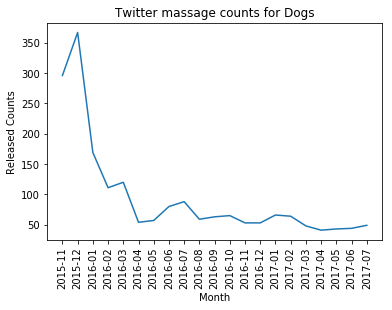

In [105]:
# 绘制推特信息按月份的发表趋势图
x = date.index
y = date.values
plt.plot(x, y)
plt.xlabel('Month')
plt.ylabel('Released Counts')
plt.title('Twitter massage counts for Dogs')
plt.xticks(rotation=90) 
plt.show()

 - 从上图中可知，根据2015年11月-2016年3月期间，推特主对宠物狗的发表信息比较多，但从2016年4月-2017年7月期间，推特主对宠物狗的发表信息明显减少，关于宠物狗的推特发表数量最高每月高于350多条信息，逐渐降低到50条信息。

In [106]:
# 创建宠物狗的分数列
twitter_archive_master['rate'] = twitter_archive_master['rating_numerator']/twitter_archive_master['rating_denominator']

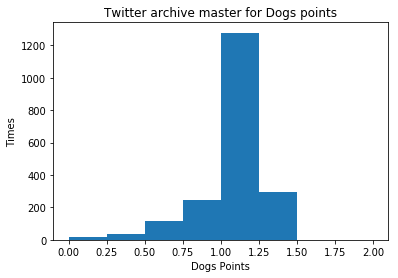

In [107]:
# 绘制宠物狗分数的直方图
plt.hist(twitter_archive_master['rate'],  bins = [0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0])
plt.title('Twitter archive master for Dogs points')
plt.xlabel('Dogs Points')
plt.ylabel('Times')
plt.show()

 - 从上图中可知，在推特中收集的宠物狗图片的评分中1.00~1.25分为最多，达到1200多条图片，其次是1.25~1.50分，可见推特主对宠物狗的评分都比较高。

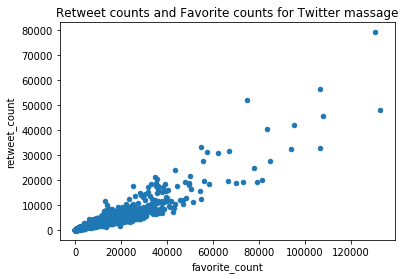

In [108]:
# 绘制宠物狗喜欢数量和转发数量的关系图
twitter_archive_master.plot(x = 'favorite_count', y = 'retweet_count', kind='scatter');
plt.title('Retweet counts and Favorite counts for Twitter massage');

 - 从上图中可知，推特中对宠物狗图片的喜欢数（favorite_count）和转发数（retweet_count）成正比，对宠物狗图片的喜欢数越多，转发数也越多。

## 结论

关于 WeRateDogs 的推特主对宠物狗评分的数据，分别来自3种不同的数据来源，进行数据评估和清理，得到了以下结论。

1.根据2015年11月-2016年3月期间，推特主对宠物狗的发表信息比较多，但从2016年4月-2017年7月期间，推特主对宠物狗的发表信息明显减少，关于宠物狗的推特发表数量最高每月高于350多条信息，逐渐降低到50条信息。

2.在推特中收集的宠物狗图片的评分中1.00~1.25分为最多，达到1200多条图片，其次是1.25~1.50分，可见推特主对宠物狗的评分都比较高。

3.推特中对宠物狗图片的喜欢数（favorite_count）和转发数（retweet_count）成正比，对宠物狗图片的喜欢数越多，转发数也越多。